# 1. 데이터 가져오기

In [34]:
df = read.csv("Project/pdata/happy_0812.csv")
head(df)

country,year,HS,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,country_num,continent
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,3.0,0.7901894,0.5896119,5.77,6.373,2.298615,4,AS
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,3.1,0.7708637,0.6046841,6.23,6.180,2.406117,4,AS
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,3.2,0.7569276,0.6264676,6.60,5.977,2.539439,4,AS
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,3.3,0.7403437,0.6460586,6.87,5.770,2.656310,4,AS
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,3.4,0.7241509,0.6583662,7.08,5.562,2.745618,4,AS
Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,3.5,0.7100469,0.6780369,7.34,5.359,2.852844,4,AS


#### country, year, country_num, continent 변수 범주화

In [35]:
df$country <- as.factor(df$country)
df$year <- as.factor(df$year)
df$country_num <- as.factor(df$country_num)
df$continent <- as.factor(df$continent)
str(df)

'data.frame':	1890 obs. of  17 variables:
 $ country    : Factor w/ 158 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year       : Factor w/ 16 levels "2005","2006",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ HS         : num  3.72 4.4 4.76 3.83 3.78 ...
 $ log_gdp    : num  7.37 7.54 7.65 7.62 7.71 ...
 $ social     : num  0.451 0.552 0.539 0.521 0.521 0.484 0.526 0.529 0.559 0.491 ...
 $ life_exp   : num  50.8 51.2 51.6 51.9 52.2 ...
 $ freedom    : num  0.718 0.679 0.6 0.496 0.531 0.578 0.509 0.389 0.523 0.427 ...
 $ generosity : num  0.168 0.19 0.121 0.162 0.236 0.061 0.104 0.08 0.042 -0.121 ...
 $ corruption : num  0.882 0.85 0.707 0.731 0.776 0.823 0.871 0.881 0.793 0.954 ...
 $ schooling  : num  3 3.1 3.2 3.3 3.4 3.5 3.5 3.6 3.6 3.8 ...
 $ alcohol    : num  0.79 0.771 0.757 0.74 0.724 ...
 $ suicide    : num  0.59 0.605 0.626 0.646 0.658 ...
 $ obesity    : num  5.77 6.23 6.6 6.87 7.08 7.34 7.34 7.37 7.45 8.5 ...
 $ birth      : num  6.37 6.18 5.98 5.77 5.56 ...
 $ mental     : num

#### 예측변수의 수치 데이터 minmax 정규화

In [36]:
normalize <- function(x){
  return((x-min(x))/(max(x)-min(x)))
}

dfnor <- as.data.frame(lapply(df[4:15],normalize))
dfnor[c('HS','year','country','country_num','continent')] <- df[c('HS','year','country','country_num','continent')]

summary(dfnor)

    log_gdp           social          life_exp         freedom      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3681   1st Qu.:0.6618   1st Qu.:0.5991   1st Qu.:0.5378  
 Median :0.5665   Median :0.7877   Median :0.7362   Median :0.6988  
 Mean   :0.5476   Mean   :0.7530   Mean   :0.6970   Mean   :0.6684  
 3rd Qu.:0.7421   3rd Qu.:0.8867   3rd Qu.:0.8119   3rd Qu.:0.8236  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
   generosity       corruption       schooling         alcohol       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2110   1st Qu.:0.6880   1st Qu.:0.3906   1st Qu.:0.02874  
 Median :0.2957   Median :0.8038   Median :0.6094   Median :0.06871  
 Mean   :0.3221   Mean   :0.7460   Mean   :0.5699   Mean   :0.11129  
 3rd Qu.:0.4095   3rd Qu.:0.8787   3rd Qu.:0.7812   3rd Qu.:0.11452  
 Max.   :1.0000   Max.   :1.

In [37]:
head(dfnor)

log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
0.1466188,0.2309900,0.4129464,0.6327373,0.4869313,0.8934599,0.1328125,0.02334898,0.05573201,0.1961259,0.8135515,0.1342338,3.724,2008,Afghanistan,4,AS
0.1805306,0.3758967,0.4218750,0.5790922,0.5082285,0.8597046,0.1406250,0.02261579,0.05809457,0.2146893,0.7840318,0.1438455,4.402,2009,Afghanistan,4,AS
0.2018751,0.3572453,0.4308036,0.4704264,0.4414327,0.7088608,0.1484375,0.02208708,0.06150912,0.2296207,0.7529826,0.1557656,4.758,2010,Afghanistan,4,AS
0.1964891,0.3314204,0.4379464,0.3273728,0.4811229,0.7341772,0.1562500,0.02145792,0.06458000,0.2405165,0.7213215,0.1662150,3.832,2011,Afghanistan,4,AS
0.2134450,0.3314204,0.4450893,0.3755158,0.5527590,0.7816456,0.1640625,0.02084359,0.06650920,0.2489911,0.6895075,0.1741999,3.783,2012,Afghanistan,4,AS
0.2174347,0.2783357,0.4522321,0.4401651,0.3833495,0.8312236,0.1718750,0.02030850,0.06959256,0.2594835,0.6584582,0.1837868,3.572,2013,Afghanistan,4,AS


##### 정규화 후 0 되는 값 log변환하면 -inf 됨 -> 두번째로 작은 값으로 바꾸기 

In [39]:
sum(is.infinite(log(dfnor$alcohol)))   # 3개
sum(is.infinite(log(dfnor$suicide)))   # 1개
sum(is.infinite(log(dfnor$birth)))     # 1개

[1] 3

[1] 1

[1] 1

In [40]:
## alcohol -inf 데이터 찾기
idx <- (log(dfnor$alcohol)== -Inf)
dfnor[idx,]   # 1484,1485,1486
sort(dfnor$alcohol, decreasing = F)[1:5]   # 두번째로 작은 값 3.698924e-05
dfnor$alcohol[idx] <- 3.698924e-05

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
1484,0.9626970,0.8708752,0.9866071,0.9188446,0.4559535,0.13396624,0.796875,0,0.3554143,0.2800646,0.02416641,0.841428,6.378,2017,Singapore,702,AS
1485,0.9684819,0.8794835,0.9933036,0.9050894,0.2604066,0.06540084,0.796875,0,0.3554143,0.2800646,0.02431936,0.841428,6.375,2018,Singapore,702,AS
1486,0.9676840,0.9110473,1.0000000,0.9353508,0.3504356,0.03691983,0.796875,0,0.3554143,0.2800646,0.02493117,0.841428,6.378,2019,Singapore,702,AS


[1] 0.000000e+00 0.000000e+00 0.000000e+00 3.698924e-05 1.597195e-04

In [41]:
##suicide -inf 데이터 찾기
idx <- (log(dfnor$suicide)== -Inf)
dfnor[idx,]   # 661
sort(dfnor$suicide, decreasing = F)[1:5]   # 두번째로 작은 값 0.01035220
dfnor$suicide[idx] <- 0.01035220

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
661,0.1494115,0.3787661,0,0.1581843,0.5333979,0.8575949,0.265625,0.1313798,0,0.02461663,0.362955,0,3.766,2010,Haiti,332,Nor.A


[1] 0.00000000 0.01035220 0.01043459 0.01170680 0.01310877

In [42]:
# birth -inf 데이터 찾기, 두번째로 작은 값으로 변경
idx <- (log(dfnor$birth)== -Inf)
dfnor[idx,]   # 1613
sort(dfnor$birth, decreasing = F)[1:5]   # 두번째로 작은 값 0.0004588559
dfnor$birth[idx] <- 0.0004588559

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
1613,0.8090963,0.7761836,0.8325893,0.5763411,0.3291384,0.8291139,0.296875,0.03489101,0.4361455,0.346247,0,0.4708261,6.229,2010,Taiwan,158,AS


[1] 0.0000000000 0.0004588559 0.0018354237 0.0041297033 0.0042826552

# 2. 회귀식 적합

#### fit1 : 변수변환 X

In [43]:
# 회귀식 적합
fit1<-lm(HS ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
          alcohol + suicide + obesity + birth + mental, data=dfnor)
summary(fit1)

# Multiple R-squared:  0.9059,	Adjusted R-squared:  0.8967  


Call:
lm(formula = HS ~ country + log_gdp + social + life_exp + freedom + 
    generosity + corruption + schooling + alcohol + suicide + 
    obesity + birth + mental, data = dfnor)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47821 -0.19550 -0.00733  0.19445  1.71033 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      2.668216   0.395813   6.741 2.14e-11 ***
countryAlbania                   0.263458   0.262623   1.003 0.315916    
countryAlgeria                   0.578431   0.246016   2.351 0.018826 *  
countryAngola                   -1.113805   0.275010  -4.050 5.35e-05 ***
countryArgentina                 0.391210   0.292478   1.338 0.181213    
countryArmenia                   0.099338   0.283122   0.351 0.725732    
countryAustralia                 0.339173   0.396311   0.856 0.392214    
countryAustria                   0.286384   0.373816   0.766 0.443716    
countryAzerbaijan               

#### fit1 가정 테스트

In [44]:
# 정규성 테스트
shapiro.test(resid(fit1))  

# 등분산성 검정 
library(lmtest)
bptest(fit1) 

# 독립성 검정
dwtest(fit1)   # DW = 1.3235


	Shapiro-Wilk normality test

data:  resid(fit1)
W = 0.9833, p-value = 4.69e-14



	studentized Breusch-Pagan test

data:  fit1
BP = 464.72, df = 169, p-value < 2.2e-16



	Durbin-Watson test

data:  fit1
DW = 1.3235, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


####  fit1 boxcox 변환

[1] 2.070707

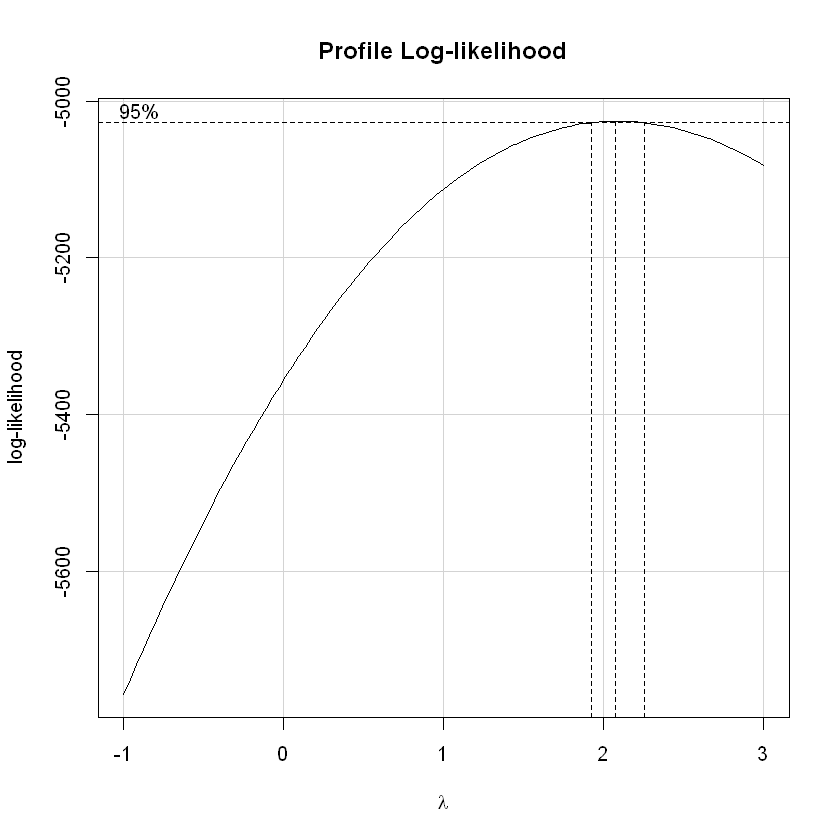

In [45]:
library(car)
bc <- boxCox(fit1,lambda=seq(-1,3))
lambda <- bc$x[which.max(bc$y)]  # 최적의 람다 값 찾기(log-likelihood가 최대가 되는 람다값)
lambda # 2.07070707070707

#### fit2 : boxcox 결과로 반응변수 변환

In [46]:
fit2<-lm(HS^lambda ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
          alcohol + suicide + obesity + birth + mental, data=dfnor)
summary(fit2)

# Multiple R-squared:  0.9206,	Adjusted R-squared:  0.9127 


Call:
lm(formula = HS^lambda ~ country + log_gdp + social + life_exp + 
    freedom + generosity + corruption + schooling + alcohol + 
    suicide + obesity + birth + mental, data = dfnor)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.6239  -2.5444  -0.1472   2.3881  19.6953 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       4.68383    4.72735   0.991 0.321926    
countryAlbania                   -0.26256    3.13662  -0.084 0.933298    
countryAlgeria                    4.14848    2.93827   1.412 0.158167    
countryAngola                   -15.76602    3.28456  -4.800 1.72e-06 ***
countryArgentina                  3.36609    3.49318   0.964 0.335372    
countryArmenia                   -1.32053    3.38144  -0.391 0.696198    
countryAustralia                  7.15170    4.73330   1.511 0.130989    
countryAustria                    5.57616    4.46464   1.249 0.211849    
countryAzerbaijan        

#### fit2 가정 테스트

In [47]:
# 정규성 테스트
shapiro.test(resid(fit2))  

# 등분산성 검정 
library(lmtest)
bptest(fit2) 

# 독립성 검정
dwtest(fit2)  # DW = 1.334


	Shapiro-Wilk normality test

data:  resid(fit2)
W = 0.98596, p-value = 1.195e-12



	studentized Breusch-Pagan test

data:  fit2
BP = 397.43, df = 169, p-value < 2.2e-16



	Durbin-Watson test

data:  fit2
DW = 1.334, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


#### fit3 : alcohol, suicide, birth만 로그 변환 

In [48]:
fit3<-lm(HS ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
          log(alcohol) + log(suicide) + obesity +log(birth) + mental, data=dfnor)
summary(fit3)

# Multiple R-squared:  0.9068,	Adjusted R-squared:  0.8976 


Call:
lm(formula = HS ~ country + log_gdp + social + life_exp + freedom + 
    generosity + corruption + schooling + log(alcohol) + log(suicide) + 
    obesity + log(birth) + mental, data = dfnor)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.46799 -0.19628 -0.00522  0.19533  1.68764 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.9357371  0.3644691  10.799  < 2e-16 ***
countryAlbania                   0.3617270  0.2382873   1.518 0.129191    
countryAlgeria                   0.5802181  0.2399220   2.418 0.015694 *  
countryAngola                   -1.2025217  0.2811344  -4.277 1.99e-05 ***
countryArgentina                 0.2034200  0.3005912   0.677 0.498666    
countryArmenia                  -0.0722541  0.2718165  -0.266 0.790410    
countryAustralia                 0.1849410  0.4164302   0.444 0.657019    
countryAustria                   0.1165168  0.3974597   0.293 0.769440    
countryA

#### fir3 가정 테스트

In [49]:
# 정규성 테스트
shapiro.test(resid(fit3))  

# 등분산성 검정 
library(lmtest)
bptest(fit3) 

# 독립성 검정
dwtest(fit3)  # DW = 1.3282


	Shapiro-Wilk normality test

data:  resid(fit3)
W = 0.98408, p-value = 1.176e-13



	studentized Breusch-Pagan test

data:  fit3
BP = 453.66, df = 169, p-value < 2.2e-16



	Durbin-Watson test

data:  fit3
DW = 1.3282, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


#### fit3 boxcox 변환

[1] 2.111111

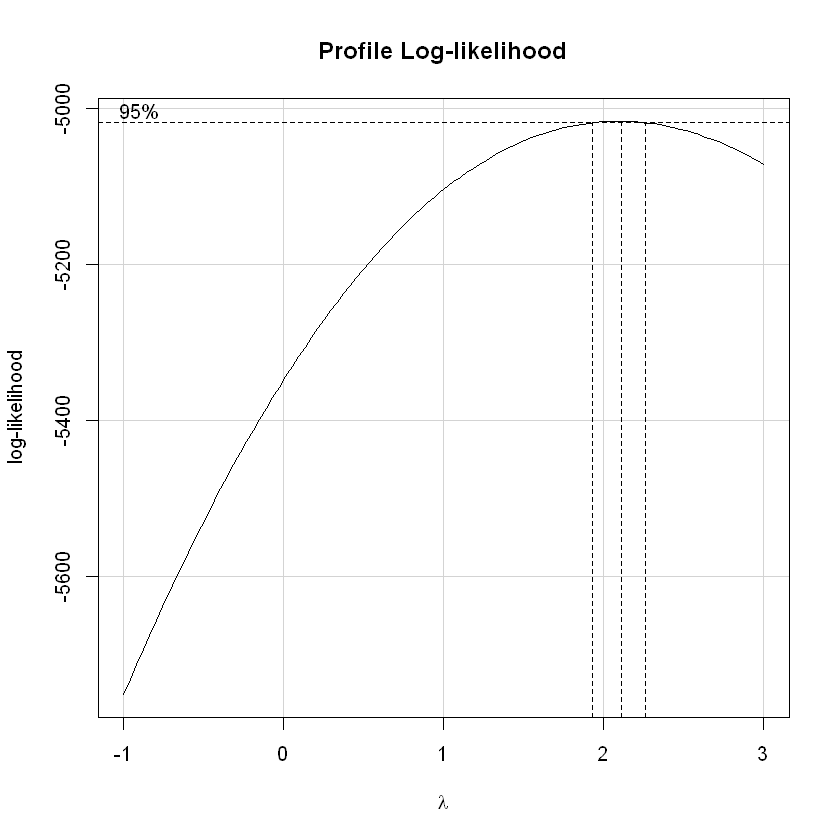

In [50]:
library(car)
bc <- boxCox(fit3,lambda=seq(-1,3))
lambda <- bc$x[which.max(bc$y)]  # 최적의 람다 값 찾기(log-likelihood가 최대가 되는 람다값)
lambda # 2.11111111111111

#### fit4 : boxcox 결과로 반응변수 변환 + alcohol, suicide, birth 로그변환

In [54]:
fit4<-lm(HS^lambda ~ country +log_gdp + social + life_exp + freedom + generosity + corruption + schooling +
           log(alcohol) + log(suicide) + obesity + log(birth) + mental, data=df)
summary(fit4)

# Multiple R-squared:  0.9214,	Adjusted R-squared:  0.9137   => fit1~ fit4 중 미세하게 가장 높음


Call:
lm(formula = HS^lambda ~ country + log_gdp + social + life_exp + 
    freedom + generosity + corruption + schooling + log(alcohol) + 
    log(suicide) + obesity + log(birth) + mental, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.8612  -2.7703  -0.2016   2.6093  22.5660 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -101.82824   10.07750 -10.105  < 2e-16 ***
countryAlbania                     3.88984    3.54732   1.097 0.272988    
countryAlgeria                     4.29292    3.20752   1.338 0.180945    
countryAngola                    -16.15742    3.72144  -4.342 1.50e-05 ***
countryArgentina                   7.68918    4.08317   1.883 0.059850 .  
countryArmenia                     3.57206    3.86300   0.925 0.355259    
countryAustralia                  13.48317    5.54554   2.431 0.015144 *  
countryAustria                    13.69656    5.52744   2.478 0.013310 *  
coun

#### fit4 가정 테스트

In [55]:
# 정규성 테스트
shapiro.test(resid(fit4))  

# 등분산성 검정 
library(lmtest)
bptest(fit4) 

# 독립성 검정
dwtest(fit4)   # DW = 1.3468


	Shapiro-Wilk normality test

data:  resid(fit4)
W = 0.98583, p-value = 1.013e-12



	studentized Breusch-Pagan test

data:  fit4
BP = 393.02, df = 169, p-value < 2.2e-16



	Durbin-Watson test

data:  fit4
DW = 1.3468, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0
